In [4]:
import torch
import intel_extension_for_pytorch
from vae import *

enc = torch.load('encoder2.pth')
dec = torch.load('decoder2.pth')
enc.eval()
dec.eval()


Decoder(
  (mlp): Sequential(
    (0): Linear(in_features=50, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

In [5]:
import matplotlib.pyplot as plt


In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader

def my_transform(x):
    return to_tensor(x).flatten().to(device)

training_data = datasets.MNIST(
        root='data',
        train=True,
        download=True,
        transform=my_transform
    )

tensor([-0.0800, -0.0478, -0.6280,  0.1833, -0.7944, -1.4989, -0.1362,  0.0113,
         0.7703,  0.3061,  1.0656,  1.6841,  0.5580,  0.0690,  0.0923, -0.1409,
        -0.1111, -0.2674, -0.0715, -1.7099,  0.0821,  0.4015, -0.2576, -1.3532,
        -0.2654, -0.0607,  0.0554, -0.5080,  0.1645,  1.2679,  0.0235, -1.8045,
        -0.0113, -0.2109, -0.8757,  0.0510,  0.0338, -1.5276,  0.6378, -0.0893,
        -1.7529,  0.0156,  0.1806,  0.2340,  0.1017,  0.2427, -0.3761, -0.1930,
        -0.3033,  0.0743], device='xpu:0', grad_fn=<SplitBackward0>) tensor([ 4.7235,  0.9376, -0.4785,  0.9816,  0.7096,  0.2490,  0.9879, -1.0291,
         0.3423,  0.2877, -0.2076,  0.5981, -0.1936,  0.8885,  0.9793, -0.9699,
        -0.5115, -0.8752,  0.8670, -0.2088, -1.0107,  0.5016,  0.9505,  0.1931,
         0.9868, -0.9881,  1.0177, -0.0819,  0.9909, -0.4245,  0.4427,  0.2229,
         0.8547,  1.0365,  0.4015,  1.0174, -0.9631, -0.3784,  0.4057, -0.3695,
        -0.3271,  0.9526,  0.9542,  0.9032,  0.9612

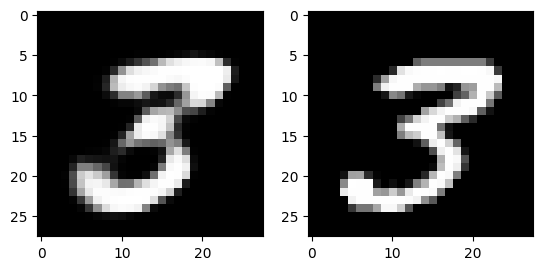

In [54]:
x, _ = training_data[203]
mu, sigma = enc(x).split(50)
print(mu, sigma)
z = mu + torch.randn(50, device='xpu')
y = dec(z.unsqueeze(0))
y = y.reshape(28, 28)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(y.cpu().detach(), cmap='gray')
ax[1].imshow(x.reshape(28,28).cpu(), cmap='gray')